In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

**STEP 1**: open exploration

2000 randomly generated scenarios with no policy with aggregated results over the complete region (problem_formulation_id == 0)

In [3]:
# Reading the results file
from ema_workbench import load_results
file_name = 'nopolicy.tar.gz'
results_np_overall = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_np_overall, outcomes_np_overall = results_np_overall

In [4]:
df_outcomes_np_overall = pd.DataFrame.from_dict(outcomes_np_overall)

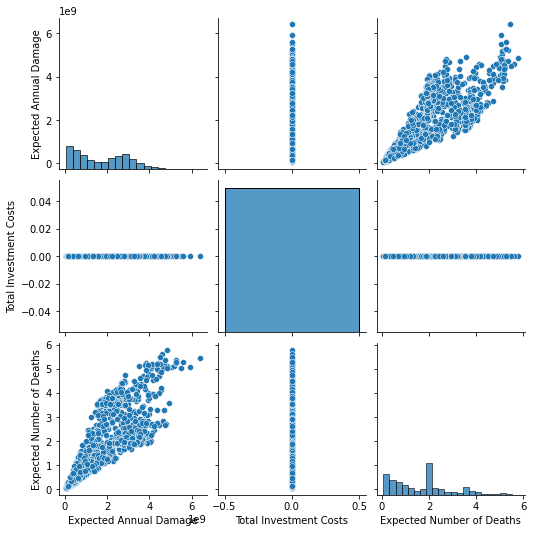

In [5]:
sns.pairplot(df_outcomes_np_overall)
plt.show()

In [9]:
from ema_workbench.analysis import prim

data = df_outcomes_np_overall["Expected Number of Deaths"]

y_np_overall = data > np.percentile(data, 80)

prim_alg = prim.Prim(experiments,y_np_overall, threshold=0.8, peel_alpha=0.05)
box1 = prim_alg.find_box()

In [10]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage        0.67
density     0.920962
id                37
mass          0.1455
mean        0.920962
res_dim            2
Name: 37, dtype: object

             box 37                                           
                min       max                        qp values
A.3_pfail  0.000336  0.153896  [-1.0, 1.2800506262715519e-159]
A.2_pfail  0.048267  0.999586       [0.2199734296989459, -1.0]



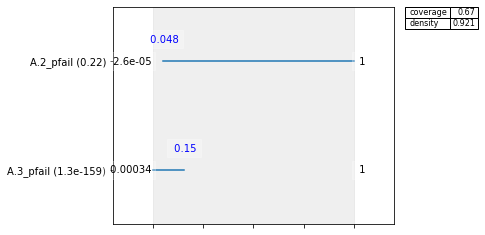

In [12]:
box2.inspect(37)
box2.inspect(37, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

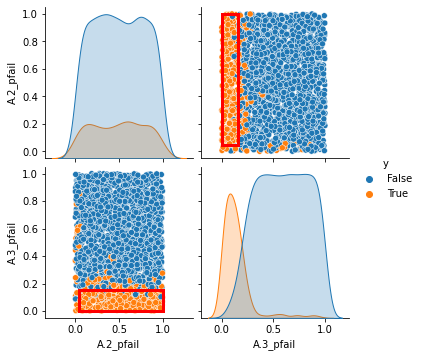

In [13]:
box2.select(37)
fig = box2.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

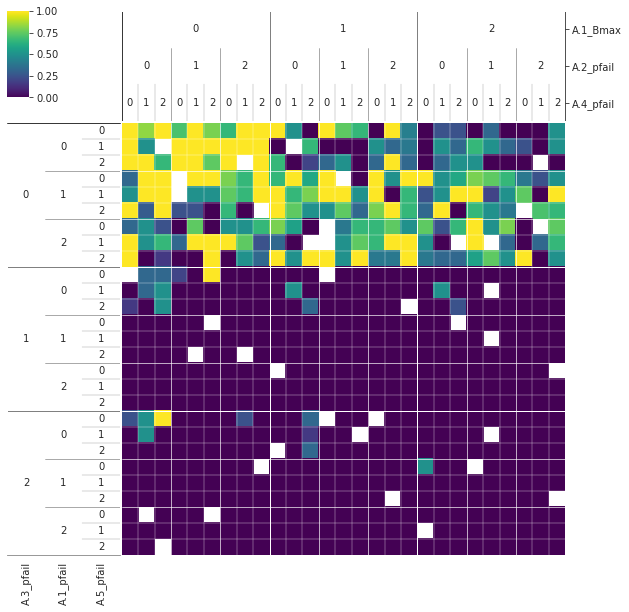

In [14]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(experiments, y_np_overall)
plt.show()

From the aggregated analysis it gets clear that the most casualties occur with a high probability of faillure of dike ring 3. This is in the Area of Zutphen and apparently this is the most vulnerable area. This will be analysed more in detail in the analysis aggregated over location. A strong dike in A1 and A2 also leads to more deaths, since this results in more water in Zutphen.

**Open exploration aggregated over the locations:**

In this section we analyse how the system functions in the different regions when there is no policy. Since we represent the province of Gelderland, a more in detail analysis of dike ring A1, A2 and A3 is analysed. 